# Pre-processing Overlay data for WaDE upload.
- Purpose: To preprocess state overlay data into one main file for simple DataFrame creation and extraction.

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import matplotlib.pyplot as plt  # plotting library
import seaborn as sns  # plotting library

# ---- API data retrieval ----
import requests  # http requests
import json  # JSON parse

# ---- Cleanup ----
import re  # string regular expression manipulation
from datetime import datetime  # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # suppress scientific notation in Pandas

In [2]:
# ---- working directory ----
workingDirString = "G:/Shared drives/WaDE Data/WaDE Data Folder/Idaho/Overlays" # set working directory folder string here
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: G:/Shared drives/WaDE Data/WaDE Data Folder/Idaho/Overlays


# Inputs
- CAMP (three separate areas & inputs)
- Groundwater Districts
- Groundwater Management Areas
- Aquifer Recharge District 

### CAMP data

In [3]:
# Eastern Snake CAMP - csv file
inputFile = "RawInputData/Eastern_Snake_Comprehensive_Aquifer_Management_Plan.zip"
gdf_es = pd.read_csv(inputFile, encoding = "ISO-8859-1").replace(np.nan, "")

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in gdf_es:
    gdf_es['WaDEUUID'] = "reESC" + gdf_es.index.astype(str)
    gdf_es.to_csv('RawInputData/Eastern_Snake_Comprehensive_Aquifer_Management_Plan.zip', compression=dict(method='zip', archive_name='Eastern_Snake_Comprehensive_Aquifer_Management_Plan.csv'), index=False)

# ReportingUnits
gdf_es['in_ReportingUnitName'] = "Eastern Snake"
gdf_es['in_ReportingUnitNativeID'] = "wadeEasternSnake"

# RegulatoryOverlay
gdf_es['in_RegulatoryName'] = "Eastern Snake CAMP"
gdf_es['in_RegulatoryOverlayNativeID'] = "wadeEasternSnake"
gdf_es['in_RegulatoryStatuteLink'] = "https://idwr.idaho.gov/iwrb/water-planning/camps/espa/"
gdf_es['in_StatutoryEffectiveDate'] = "01/01/2009"
gdf_es = gdf_es[['WaDEUUID', 'in_ReportingUnitName', 'in_ReportingUnitNativeID', 'in_RegulatoryName', 'in_RegulatoryOverlayNativeID', 'in_RegulatoryStatuteLink', 'in_StatutoryEffectiveDate', 'geometry']]

print(len(gdf_es))
gdf_es.head(1)

1


,WaDEUUID,in_ReportingUnitName,in_ReportingUnitNativeID,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,geometry
0,reESC0,Eastern Snake,wadeEasternSnake,Eastern Snake CAMP,wadeEasternSnake,https://idwr.idaho.gov/iwrb/water-planning/cam...,01/01/2009,POLYGON ((-111.67756699799997 44.2230369650000...


In [4]:
# Rathdrum CAMP - csv file
inputFile = "RawInputData/Rathdrum_Comprehensive_Aquifer_Management_Plan.zip"
gdf_r = pd.read_csv(inputFile, encoding = "ISO-8859-1").replace(np.nan, "")

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in gdf_r:
    gdf_r['WaDEUUID'] = "reRC" + gdf_es.index.astype(str)
    gdf_r.to_csv('RawInputData/Rathdrum_Comprehensive_Aquifer_Management_Plan.zip', compression=dict(method='zip', archive_name='Rathdrum_Comprehensive_Aquifer_Management_Plan.csv'), index=False)

# ReportingUnits
gdf_r['in_ReportingUnitName'] = "Rathdrum Prairie"
gdf_r['in_ReportingUnitNativeID'] = "wadeRathdrumPrairie"

# RegulatoryOverlay
gdf_r['in_RegulatoryName'] = "Rathdrum Prairie CAMP"
gdf_r['in_RegulatoryOverlayNativeID'] = "wadeRathdrumPrairie"
gdf_r['in_RegulatoryStatuteLink'] = "https://idwr.idaho.gov/IWRB/water-planning/CAMPs/rathdrum-prairie/"
gdf_r['in_StatutoryEffectiveDate'] = "01/01/2009"
gdf_r = gdf_r[['WaDEUUID', 'in_ReportingUnitName', 'in_ReportingUnitNativeID', 'in_RegulatoryName', 'in_RegulatoryOverlayNativeID', 'in_RegulatoryStatuteLink', 'in_StatutoryEffectiveDate', 'geometry']]

print(len(gdf_r))
gdf_r.head()

1


,WaDEUUID,in_ReportingUnitName,in_ReportingUnitNativeID,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,geometry
0,reRC0,Rathdrum Prairie,wadeRathdrumPrairie,Rathdrum Prairie CAMP,wadeRathdrumPrairie,https://idwr.idaho.gov/IWRB/water-planning/CAM...,01/01/2009,POLYGON ((-116.78942222499995 48.0484003340000...


In [5]:
# Treasure Valley CAMP - csv file
inputFile = "RawInputData/Treasure_Valley_Comprehensive_Aquifer_Management_Plan.zip"
gdf_tv =  pd.read_csv(inputFile, encoding = "ISO-8859-1").replace(np.nan, "")

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in gdf_tv:
    gdf_tv['WaDEUUID'] = "reTVC" + gdf_tv.index.astype(str)
    gdf_tv.to_csv('RawInputData/Treasure_Valley_Comprehensive_Aquifer_Management_Plan.zip', compression=dict(method='zip', archive_name='Treasure_Valley_Comprehensive_Aquifer_Management_Plan.csv'), index=False)

# ReportingUnits
gdf_tv['in_ReportingUnitName'] = "Treasure Valley"
gdf_tv['in_ReportingUnitNativeID'] = "wadeTreasureValley"

# RegulatoryOverlay
gdf_tv['in_RegulatoryName'] = "Treasure Valley CAMP"
gdf_tv['in_RegulatoryOverlayNativeID'] = "wadeTreasureValley"
gdf_tv['in_RegulatoryStatuteLink'] = "https://idwr.idaho.gov/iwrb/water-planning/camps/treasure-valley/"
gdf_tv['in_StatutoryEffectiveDate'] = "01/01/2009"
gdf_tv = gdf_tv[['WaDEUUID', 'in_ReportingUnitName', 'in_ReportingUnitNativeID', 'in_RegulatoryName', 'in_RegulatoryOverlayNativeID', 'in_RegulatoryStatuteLink', 'in_StatutoryEffectiveDate', 'geometry']]


print(len(gdf_tv))
gdf_tv.head(1)

1


,WaDEUUID,in_ReportingUnitName,in_ReportingUnitNativeID,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,geometry
0,reTVC0,Treasure Valley,wadeTreasureValley,Treasure Valley CAMP,wadeTreasureValley,https://idwr.idaho.gov/iwrb/water-planning/cam...,01/01/2009,POLYGON ((-116.61388463099996 43.8259754730000...


In [6]:
# Concatenate inputs DataFrames together
frames = [gdf_es, gdf_r, gdf_tv]
gdf_Camp = pd.concat(frames)
print(len(gdf_Camp))
gdf_Camp.head()

3


,WaDEUUID,in_ReportingUnitName,in_ReportingUnitNativeID,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,geometry
0,reESC0,Eastern Snake,wadeEasternSnake,Eastern Snake CAMP,wadeEasternSnake,https://idwr.idaho.gov/iwrb/water-planning/cam...,01/01/2009,POLYGON ((-111.67756699799997 44.2230369650000...
0,reRC0,Rathdrum Prairie,wadeRathdrumPrairie,Rathdrum Prairie CAMP,wadeRathdrumPrairie,https://idwr.idaho.gov/IWRB/water-planning/CAM...,01/01/2009,POLYGON ((-116.78942222499995 48.0484003340000...
0,reTVC0,Treasure Valley,wadeTreasureValley,Treasure Valley CAMP,wadeTreasureValley,https://idwr.idaho.gov/iwrb/water-planning/cam...,01/01/2009,POLYGON ((-116.61388463099996 43.8259754730000...


In [7]:
# create output POD dataframe
df = pd.DataFrame(index=gdf_Camp.index)

# Data Assessment UUID
df['WaDEUUID'] = gdf_Camp['WaDEUUID']

# Date Info
df['in_Date'] = "10/2/2023"
df['in_Year'] = "2023"

# Organization
df['in_OrganizationUUID'] = "IDre_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = gdf_Camp['in_ReportingUnitName']
df['in_ReportingUnitNativeID'] = gdf_Camp['in_ReportingUnitNativeID']
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Comprehensive Aquifer Management Plan"
df['in_ReportingUnitUpdateDate'] = ""
df['in_StateCV'] = "ID"
df['in_Geometry'] = ""

# RegulatoryOverlay Info
df['in_OversightAgency'] = "Idaho Department of Water Resources"
df['in_RegulatoryDescription'] = """The 2008 Legislature approved House Bill 428 and House Bill 644 establishing the Statewide Comprehensive Aquifer Planning and Management Program (Idaho Code § 42-1779) and the Aquifer Planning and Management Fund (Idaho Code § 42-1780). This legislation authorized characterization and planning efforts for ten different basins from 2008 through 2018.

The Comprehensive Aquifer Planning and Management Program was designed to provide IWRB and IDWR with the necessary information to develop plans for managing groundwater and surface water resources into the future. The program had two phases: a technical component to characterize the surface water and groundwater resources of each basin a planning component to integrate the technical knowledge with an assessment of current and projected future water uses and constraints.  At the culmination of this program, the intent was to develop long-range plans for conjunctively managing the water resources of each basin by integrating hydrologic realities with the social needs. These water management plans were designed to address water supply and demand issues looking out 50 years into the future, and investigated strategies which will lead to sustainable water supplies and optimum use of the water resources."""

df['in_RegulatoryName'] = gdf_Camp['in_RegulatoryName']
df['in_RegulatoryOverlayNativeID'] = gdf_Camp['in_RegulatoryOverlayNativeID']
df['in_RegulatoryStatusCV'] = "Active"
df['in_RegulatoryStatute'] = ""
df['in_RegulatoryStatuteLink'] = gdf_Camp['in_RegulatoryStatuteLink']
df['in_StatutoryEffectiveDate'] = gdf_Camp['in_StatutoryEffectiveDate']
df['in_StatutoryEndDate'] = ""
df['in_RegulatoryOverlayTypeCV'] = "Comprehensive Aquifer Management Plan"
df['in_WaterSourceTypeCV'] = "Groundwater"


df = df.drop_duplicates().reset_index(drop=True)
outDfCamp = df.copy()
print(len(outDfCamp))
outDfCamp.head()

3


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,reESC0,10/2/2023,2023,IDre_O1,4326,Eastern Snake,wadeEasternSnake,,Comprehensive Aquifer Management Plan,,ID,,Idaho Department of Water Resources,The 2008 Legislature approved House Bill 428 a...,Eastern Snake CAMP,wadeEasternSnake,Active,,https://idwr.idaho.gov/iwrb/water-planning/cam...,01/01/2009,,Comprehensive Aquifer Management Plan,Groundwater
1,reRC0,10/2/2023,2023,IDre_O1,4326,Rathdrum Prairie,wadeRathdrumPrairie,,Comprehensive Aquifer Management Plan,,ID,,Idaho Department of Water Resources,The 2008 Legislature approved House Bill 428 a...,Rathdrum Prairie CAMP,wadeRathdrumPrairie,Active,,https://idwr.idaho.gov/IWRB/water-planning/CAM...,01/01/2009,,Comprehensive Aquifer Management Plan,Groundwater
2,reTVC0,10/2/2023,2023,IDre_O1,4326,Treasure Valley,wadeTreasureValley,,Comprehensive Aquifer Management Plan,,ID,,Idaho Department of Water Resources,The 2008 Legislature approved House Bill 428 a...,Treasure Valley CAMP,wadeTreasureValley,Active,,https://idwr.idaho.gov/iwrb/water-planning/cam...,01/01/2009,,Comprehensive Aquifer Management Plan,Groundwater


### Groundwater Districts data

In [8]:
# Input File - shp file
inputFile = "RawInputData/shapefiles/Groundwater_Districts.zip"
gdf_GD = gpd.read_file(inputFile, encoding = "ISO-8859-1").replace(np.nan, "")

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in gdf_GD:
    gdf_GD['WaDEUUID'] = "regdd" + gdf_GD.index.astype(str)
    gdf_GD.to_csv('RawInputData/Groundwater_Districts.zip', compression=dict(method='zip', archive_name='Groundwater_District.csv'), index=False)

print(len(gdf_GD))
gdf_GD.head()

13


,OBJECTID,NAME,ACRES,Shape_Leng,AreaID,DisName,ShapeSTAre,ShapeSTLen,geometry,WaDEUUID
0,1,Aberdeen-American Falls Ground Water District,974236.86803,,30,Aberdeen-American Falls,3942596726.85730,502609.65633,"POLYGON ((2580691.746 1328651.278, 2581205.058...",regdd0
1,2,Bonneville-Jefferson Ground Water District,353013.81394,,32,Bonneville-Jefferson,1428481975.85137,170305.57259,"POLYGON ((2657558.038 1395336.927, 2657596.600...",regdd1
2,3,Magic Valley Ground Water District,496532.99069,,34,Magic Valley,2009397722.07543,207039.99685,"POLYGON ((2503742.373 1300833.092, 2505349.080...",regdd2
3,4,North Snake Ground Water District,644061.59630,,35,North Snake,2606424807.24499,280770.63934,"POLYGON ((2479677.961 1310684.740, 2480890.285...",regdd3
4,5,Madison Ground Water District,177356.43754,,33,Madison,717736037.54243,125509.30818,"POLYGON ((2680149.779 1410027.756, 2680140.675...",regdd4


In [9]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = gdf_GD['WaDEUUID']

# Date Info
df['in_Date'] = "10/2/2023"
df['in_Year'] = "2023"

# Organization Info
df['in_OrganizationUUID'] = "IDre_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = gdf_GD["NAME"]
df['in_ReportingUnitNativeID'] = "wadeGD" + gdf_GD["OBJECTID"].astype(str)
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Groundwater Districts"
df['in_ReportingUnitUpdateDate'] = ""
df['in_StateCV'] = "ID"
df['in_Geometry'] = ""

# RegulatoryOverlay Info
df['in_OversightAgency'] = "Idaho Department of Water Resources"
df['in_RegulatoryDescription'] = "Manages water via water allocation and distribution processes."
df['in_RegulatoryName'] = gdf_GD["NAME"]
df['in_RegulatoryOverlayNativeID'] = "wadeGD" + gdf_GD["OBJECTID"].astype(str)
df['in_RegulatoryStatusCV'] = "Active"
df['in_RegulatoryStatute'] = ""
df['in_RegulatoryStatuteLink'] = "https://idwr.idaho.gov/water-rights/groundwater-districts/"
df['in_StatutoryEffectiveDate'] = "1/1/1995"
df['in_StatutoryEndDate'] = ""
df['in_RegulatoryOverlayTypeCV'] = "Groundwater Districts"
df['in_WaterSourceTypeCV'] = "Groundwater"

df = df.drop_duplicates().reset_index(drop=True)
outDfGD = df.copy()
print(len(outDfGD))
outDfGD.head()

13


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,regdd0,10/2/2023,2023,IDre_O1,4326,Aberdeen-American Falls Ground Water District,wadeGD1,,Groundwater Districts,,ID,,Idaho Department of Water Resources,Manages water via water allocation and distrib...,Aberdeen-American Falls Ground Water District,wadeGD1,Active,,https://idwr.idaho.gov/water-rights/groundwate...,1/1/1995,,Groundwater Districts,Groundwater
1,regdd1,10/2/2023,2023,IDre_O1,4326,Bonneville-Jefferson Ground Water District,wadeGD2,,Groundwater Districts,,ID,,Idaho Department of Water Resources,Manages water via water allocation and distrib...,Bonneville-Jefferson Ground Water District,wadeGD2,Active,,https://idwr.idaho.gov/water-rights/groundwate...,1/1/1995,,Groundwater Districts,Groundwater
2,regdd2,10/2/2023,2023,IDre_O1,4326,Magic Valley Ground Water District,wadeGD3,,Groundwater Districts,,ID,,Idaho Department of Water Resources,Manages water via water allocation and distrib...,Magic Valley Ground Water District,wadeGD3,Active,,https://idwr.idaho.gov/water-rights/groundwate...,1/1/1995,,Groundwater Districts,Groundwater
3,regdd3,10/2/2023,2023,IDre_O1,4326,North Snake Ground Water District,wadeGD4,,Groundwater Districts,,ID,,Idaho Department of Water Resources,Manages water via water allocation and distrib...,North Snake Ground Water District,wadeGD4,Active,,https://idwr.idaho.gov/water-rights/groundwate...,1/1/1995,,Groundwater Districts,Groundwater
4,regdd4,10/2/2023,2023,IDre_O1,4326,Madison Ground Water District,wadeGD5,,Groundwater Districts,,ID,,Idaho Department of Water Resources,Manages water via water allocation and distrib...,Madison Ground Water District,wadeGD5,Active,,https://idwr.idaho.gov/water-rights/groundwate...,1/1/1995,,Groundwater Districts,Groundwater


### Groundwater Management Areas data

In [10]:
# Input File - shp file
inputFile = "RawInputData/shapefiles/Groundwater_Management_Areas.zip"
gdf_GMA = gpd.read_file(inputFile, encoding = "ISO-8859-1").replace(np.nan, "")

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in gdf_GMA:
    gdf_GMA['WaDEUUID'] = "regma" + gdf_GMA.index.astype(str)
    gdf_GMA.to_csv('RawInputData/Groundwater_Management_Areas.zip', compression=dict(method='zip', archive_name='Groundwater_Management_Areas.csv'), index=False)

print(len(gdf_GMA))
gdf_GMA.head()

14


,OBJECTID,NAME,ACRES,AREA_METER,PERIMETER_,HECTARES,SubArea,AreaID,DisName,ShapeSTAre,ShapeSTLen,geometry,WaDEUUID
0,1,Banbury Hot Springs,9509.58900,38483941.66100,49539.98200,3848.39400,,2,Banbury Hot Springs,38483941.66149,49539.98233,"POLYGON ((2430632.943 1280849.878, 2430622.000...",regma0
1,2,Bear River,1392979.38900,5637187584.77700,413953.80100,563718.75800,,41,Bear River,5637187584.43399,413953.80120,"POLYGON ((2690295.780 1277709.362, 2690295.947...",regma1
2,3,Big Wood River,1073376.59700,4343800976.92200,460101.77500,434380.09800,,8,Big Wood River,4343800976.95913,460101.77455,"POLYGON ((2446116.629 1413555.102, 2446251.661...",regma2
3,4,Boise Front,74614.74500,301955161.49000,83933.22000,30195.51600,,11,Boise Front,301955161.77371,83933.21950,"POLYGON ((2330709.591 1370550.688, 2324324.821...",regma3
4,5,Bruneau-Grandview,408134.24300,1651660681.81600,209083.22000,165166.06800,,15,Bruneau-Grandview,1651660681.84325,209083.21958,"POLYGON ((2318067.635 1323898.797, 2318266.762...",regma4


In [11]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = gdf_GMA['WaDEUUID']

# Date Info
df['in_Date'] = "10/2/2023"
df['in_Year'] = "2023"

# Organization Info
df['in_OrganizationUUID'] = "IDre_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = gdf_GMA["NAME"]
df['in_ReportingUnitNativeID'] = "wadeGMA" + gdf_GMA["OBJECTID"].astype(str)
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Groundwater Management Areas"
df['in_ReportingUnitUpdateDate'] = "4/27/2023"
df['in_StateCV'] = "ID"
df['in_Geometry'] = ""

# RegulatoryOverlay Info
df['in_OversightAgency'] = "Idaho Department of Water Resources"
df['in_RegulatoryDescription'] = "Manages water via water allocation and distribution processes."
df['in_RegulatoryName'] = gdf_GMA["NAME"]
df['in_RegulatoryOverlayNativeID'] = "wadeGMA" + gdf_GMA["OBJECTID"].astype(str)
df['in_RegulatoryStatusCV'] = "Active"
df['in_RegulatoryStatute'] = ""
df['in_RegulatoryStatuteLink'] = "https://idwr.idaho.gov/water-rights/groundwater-management-areas/"
df['in_StatutoryEffectiveDate'] = "1/1/1982"
df['in_StatutoryEndDate'] = ""
df['in_RegulatoryOverlayTypeCV'] = "Groundwater Management Areas"
df['in_WaterSourceTypeCV'] = "Groundwater"

df = df.drop_duplicates().reset_index(drop=True)
outDfGMA = df.copy()
print(len(outDfGMA))
outDfGMA.head()

14


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,regma0,10/2/2023,2023,IDre_O1,4326,Banbury Hot Springs,wadeGMA1,,Groundwater Management Areas,4/27/2023,ID,,Idaho Department of Water Resources,Manages water via water allocation and distrib...,Banbury Hot Springs,wadeGMA1,Active,,https://idwr.idaho.gov/water-rights/groundwate...,1/1/1982,,Groundwater Management Areas,Groundwater
1,regma1,10/2/2023,2023,IDre_O1,4326,Bear River,wadeGMA2,,Groundwater Management Areas,4/27/2023,ID,,Idaho Department of Water Resources,Manages water via water allocation and distrib...,Bear River,wadeGMA2,Active,,https://idwr.idaho.gov/water-rights/groundwate...,1/1/1982,,Groundwater Management Areas,Groundwater
2,regma2,10/2/2023,2023,IDre_O1,4326,Big Wood River,wadeGMA3,,Groundwater Management Areas,4/27/2023,ID,,Idaho Department of Water Resources,Manages water via water allocation and distrib...,Big Wood River,wadeGMA3,Active,,https://idwr.idaho.gov/water-rights/groundwate...,1/1/1982,,Groundwater Management Areas,Groundwater
3,regma3,10/2/2023,2023,IDre_O1,4326,Boise Front,wadeGMA4,,Groundwater Management Areas,4/27/2023,ID,,Idaho Department of Water Resources,Manages water via water allocation and distrib...,Boise Front,wadeGMA4,Active,,https://idwr.idaho.gov/water-rights/groundwate...,1/1/1982,,Groundwater Management Areas,Groundwater
4,regma4,10/2/2023,2023,IDre_O1,4326,Bruneau-Grandview,wadeGMA5,,Groundwater Management Areas,4/27/2023,ID,,Idaho Department of Water Resources,Manages water via water allocation and distrib...,Bruneau-Grandview,wadeGMA5,Active,,https://idwr.idaho.gov/water-rights/groundwate...,1/1/1982,,Groundwater Management Areas,Groundwater


### Aquifer Recharge District data

In [12]:
# Input File - shp file
inputFile = "RawInputData/shapefiles/Lower_Snake_River_Aquifer_Recharge_District.zip"
gdf_ARD = gpd.read_file(inputFile, encoding = "ISO-8859-1").replace(np.nan, "")

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in gdf_ARD:
    gdf_ARD['WaDEUUID'] = "reard" + gdf_ARD.index.astype(str)
    gdf_ARD.to_csv('RawInputData/Lower_Snake_River_Aquifer_Recharge_District.zip', compression=dict(method='zip', archive_name='Lower_Snake_River_Aquifer_Recharge_District.csv'), index=False)

# Create Name Column
gdf_ARD["NAME"] = ['Lower Snake River Aquifer Recharge District']

print(len(gdf_ARD))
gdf_ARD.head()

1


,OBJECTID,ID,ShapeSTAre,ShapeSTLen,geometry,WaDEUUID,NAME
0,1,0,274838697.01300,152808.48622,"POLYGON ((2462805.462 1267268.634, 2462718.198...",reard0,Lower Snake River Aquifer Recharge District


In [13]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = gdf_ARD['WaDEUUID']

# Date Info
df['in_Date'] = "10/2/2023"
df['in_Year'] = "2023"

# Organization Info
df['in_OrganizationUUID'] = "IDre_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = gdf_ARD["NAME"]
df['in_ReportingUnitNativeID'] = "wadeARD" + gdf_ARD["OBJECTID"].astype(str)
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Aquifer Recharge Districts"
df['in_ReportingUnitUpdateDate'] = "4/27/2023"
df['in_StateCV'] = "ID"
df['in_Geometry'] = ""

# RegulatoryOverlay Info
df['in_OversightAgency'] = "Idaho Department of Water Resources"
df['in_RegulatoryDescription'] = "Manages water via water allocation and distribution processes."
df['in_RegulatoryName'] = gdf_ARD["NAME"]
df['in_RegulatoryOverlayNativeID'] = "wadeARD" + gdf_ARD["OBJECTID"].astype(str)
df['in_RegulatoryStatusCV'] = "Active"
df['in_RegulatoryStatute'] = ""
df['in_RegulatoryStatuteLink'] = "https://idwr.idaho.gov/water-rights/aquifer-recharge-districts/"
df['in_StatutoryEffectiveDate'] = "7/1/1978"
df['in_StatutoryEndDate'] = ""
df['in_RegulatoryOverlayTypeCV'] = "Aquifer Recharge Districts"
df['in_WaterSourceTypeCV'] = "Groundwater"

df = df.drop_duplicates().reset_index(drop=True)
outDfARD = df.copy()
print(len(outDfARD))
outDfARD.head()

1


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,reard0,10/2/2023,2023,IDre_O1,4326,Lower Snake River Aquifer Recharge District,wadeARD1,,Aquifer Recharge Districts,4/27/2023,ID,,Idaho Department of Water Resources,Manages water via water allocation and distrib...,Lower Snake River Aquifer Recharge District,wadeARD1,Active,,https://idwr.idaho.gov/water-rights/aquifer-re...,7/1/1978,,Aquifer Recharge Districts,Groundwater


## Concatenate DataFrames together

In [14]:
# Concatenate dataframes
frames = [outDfCamp, outDfGD, outDfGMA, outDfARD] # list all out dataframes here
outdf = pd.concat(frames)
outdf = outdf.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
print(len(outdf))
outdf

31


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,reESC0,10/2/2023,2023,IDre_O1,4326,Eastern Snake,wadeEasternSnake,,Comprehensive Aquifer Management Plan,,ID,,Idaho Department of Water Resources,The 2008 Legislature approved House Bill 428 a...,Eastern Snake CAMP,wadeEasternSnake,Active,,https://idwr.idaho.gov/iwrb/water-planning/cam...,01/01/2009,,Comprehensive Aquifer Management Plan,Groundwater
1,reRC0,10/2/2023,2023,IDre_O1,4326,Rathdrum Prairie,wadeRathdrumPrairie,,Comprehensive Aquifer Management Plan,,ID,,Idaho Department of Water Resources,The 2008 Legislature approved House Bill 428 a...,Rathdrum Prairie CAMP,wadeRathdrumPrairie,Active,,https://idwr.idaho.gov/IWRB/water-planning/CAM...,01/01/2009,,Comprehensive Aquifer Management Plan,Groundwater
2,reTVC0,10/2/2023,2023,IDre_O1,4326,Treasure Valley,wadeTreasureValley,,Comprehensive Aquifer Management Plan,,ID,,Idaho Department of Water Resources,The 2008 Legislature approved House Bill 428 a...,Treasure Valley CAMP,wadeTreasureValley,Active,,https://idwr.idaho.gov/iwrb/water-planning/cam...,01/01/2009,,Comprehensive Aquifer Management Plan,Groundwater
3,regdd0,10/2/2023,2023,IDre_O1,4326,Aberdeen-American Falls Ground Water District,wadeGD1,,Groundwater Districts,,ID,,Idaho Department of Water Resources,Manages water via water allocation and distrib...,Aberdeen-American Falls Ground Water District,wadeGD1,Active,,https://idwr.idaho.gov/water-rights/groundwate...,1/1/1995,,Groundwater Districts,Groundwater
4,regdd1,10/2/2023,2023,IDre_O1,4326,Bonneville-Jefferson Ground Water District,wadeGD2,,Groundwater Districts,,ID,,Idaho Department of Water Resources,Manages water via water allocation and distrib...,Bonneville-Jefferson Ground Water District,wadeGD2,Active,,https://idwr.idaho.gov/water-rights/groundwate...,1/1/1995,,Groundwater Districts,Groundwater
5,regdd2,10/2/2023,2023,IDre_O1,4326,Magic Valley Ground Water District,wadeGD3,,Groundwater Districts,,ID,,Idaho Department of Water Resources,Manages water via water allocation and distrib...,Magic Valley Ground Water District,wadeGD3,Active,,https://idwr.idaho.gov/water-rights/groundwate...,1/1/1995,,Groundwater Districts,Groundwater
6,regdd3,10/2/2023,2023,IDre_O1,4326,North Snake Ground Water District,wadeGD4,,Groundwater Districts,,ID,,Idaho Department of Water Resources,Manages water via water allocation and distrib...,North Snake Ground Water District,wadeGD4,Active,,https://idwr.idaho.gov/water-rights/groundwate...,1/1/1995,,Groundwater Districts,Groundwater
7,regdd4,10/2/2023,2023,IDre_O1,4326,Madison Ground Water District,wadeGD5,,Groundwater Districts,,ID,,Idaho Department of Water Resources,Manages water via water allocation and distrib...,Madison Ground Water District,wadeGD5,Active,,https://idwr.idaho.gov/water-rights/groundwate...,1/1/1995,,Groundwater Districts,Groundwater
8,regdd5,10/2/2023,2023,IDre_O1,4326,Carey Valley Ground Water District,wadeGD6,,Groundwater Districts,,ID,,Idaho Department of Water Resources,Manages water via water allocation and distrib...,Carey Valley Ground Water District,wadeGD6,Active,,https://idwr.idaho.gov/water-rights/groundwate...,1/1/1995,,Groundwater Districts,Groundwater
9,regdd6,10/2/2023,2023,IDre_O1,4326,Raft River Ground Water District,wadeGD7,,Groundwater Districts,,ID,,Idaho Department of Water Resources,Manages water via water allocation and distrib...,Raft River Ground Water District,wadeGD7,Active,,https://idwr.idaho.gov/water-rights/groundwate...,1/1/1995,,Groundwater Districts,Groundwater


## Clean Data / data types

In [15]:
# Ensure Empty String

def ensureEmptyString(val):
    val = str(val).strip()
    if val == "" or val == " " or val == "nan" or pd.isnull(val):
        outString = ""
    else:
        outString = val
    return outString

In [16]:
outdf['in_ReportingUnitName'] = outdf.apply(lambda row: ensureEmptyString(row['in_ReportingUnitName']), axis=1)
outdf['in_ReportingUnitName'].unique()

array(['Eastern Snake', 'Rathdrum Prairie', 'Treasure Valley',
       'Aberdeen-American Falls Ground Water District',
       'Bonneville-Jefferson Ground Water District',
       'Magic Valley Ground Water District',
       'North Snake Ground Water District',
       'Madison Ground Water District',
       'Carey Valley Ground Water District',
       'Raft River Ground Water District',
       'South Valley Ground Water District',
       'Galena Ground Water District',
       'Big Lost River Ground Water District',
       'Bingham Ground Water District',
       'Jefferson Clark Ground Water District',
       'Henrys Fork Ground Water District', 'Banbury Hot Springs',
       'Bear River', 'Big Wood River', 'Boise Front', 'Bruneau-Grandview',
       'Eastern Snake Plain Aquifer', 'Lewiston Plateau', 'Malad Valley',
       'Mountain Home', 'Southeast Boise', 'Twin Falls',
       'Lower Snake River Aquifer Recharge District'], dtype=object)

In [17]:
outdf['in_RegulatoryDescription'] = outdf.apply(lambda row: ensureEmptyString(row['in_RegulatoryDescription']), axis=1)
outdf['in_RegulatoryDescription'].unique()

array(['The 2008 Legislature approved House Bill 428 and House Bill 644 establishing the Statewide Comprehensive Aquifer Planning and Management Program (Idaho Code § 42-1779) and the Aquifer Planning and Management Fund (Idaho Code § 42-1780). This legislation authorized characterization and planning efforts for ten different basins from 2008 through 2018.\n\nThe Comprehensive Aquifer Planning and Management Program was designed to provide IWRB and IDWR with the necessary information to develop plans for managing groundwater and surface water resources into the future. The program had two phases: a technical component to characterize the surface water and groundwater resources of each basin a planning component to integrate the technical knowledge with an assessment of current and projected future water uses and constraints.  At the culmination of this program, the intent was to develop long-range plans for conjunctively managing the water resources of each basin by integrating hydrol

In [18]:
outdf['in_RegulatoryName'] = outdf.apply(lambda row: ensureEmptyString(row['in_RegulatoryName']), axis=1)
outdf['in_RegulatoryName'].unique()

array(['Eastern Snake CAMP', 'Rathdrum Prairie CAMP',
       'Treasure Valley CAMP',
       'Aberdeen-American Falls Ground Water District',
       'Bonneville-Jefferson Ground Water District',
       'Magic Valley Ground Water District',
       'North Snake Ground Water District',
       'Madison Ground Water District',
       'Carey Valley Ground Water District',
       'Raft River Ground Water District',
       'South Valley Ground Water District',
       'Galena Ground Water District',
       'Big Lost River Ground Water District',
       'Bingham Ground Water District',
       'Jefferson Clark Ground Water District',
       'Henrys Fork Ground Water District', 'Banbury Hot Springs',
       'Bear River', 'Big Wood River', 'Boise Front', 'Bruneau-Grandview',
       'Eastern Snake Plain Aquifer', 'Lewiston Plateau', 'Malad Valley',
       'Mountain Home', 'Rathdrum Prairie', 'Southeast Boise',
       'Twin Falls', 'Lower Snake River Aquifer Recharge District'],
      dtype=object)

In [19]:
#Update datatype of StatutoryEffectiveDate to fit WaDE 2.0 structure
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'], errors = 'coerce')
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'].dt.strftime('%m/%d/%Y'))
outdf['in_StatutoryEffectiveDate'].unique()

<DatetimeArray>
['2009-01-01 00:00:00', '1995-01-01 00:00:00', '1982-01-01 00:00:00',
 '1978-07-01 00:00:00']
Length: 4, dtype: datetime64[ns]

# Shapefile Data

### CAMP data

In [20]:
# already got the geometery for Camp
gdf_Camp_Shape = gdf_Camp.copy()

# convert dataframe to geodataframe (CAMP data only)
gdf_Camp_Shape = gdf_Camp_Shape[gdf_Camp_Shape['geometry'] != ""].reset_index(drop=True)
gdf_Camp_Shape['geometry'] = gpd.GeoSeries.from_wkt(gdf_Camp_Shape['geometry'].astype(str), crs="EPSG:4326")
gdf_Camp_Shape = gpd.GeoDataFrame(gdf_Camp_Shape, geometry=gdf_Camp_Shape['geometry'], crs="EPSG:4326") # covert to geodataframe

print(len(gdf_Camp_Shape))
gdf_Camp_Shape.head()

3


,WaDEUUID,in_ReportingUnitName,in_ReportingUnitNativeID,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,geometry
0,reESC0,Eastern Snake,wadeEasternSnake,Eastern Snake CAMP,wadeEasternSnake,https://idwr.idaho.gov/iwrb/water-planning/cam...,01/01/2009,"POLYGON ((-111.67757 44.22304, -111.67054 44.2..."
1,reRC0,Rathdrum Prairie,wadeRathdrumPrairie,Rathdrum Prairie CAMP,wadeRathdrumPrairie,https://idwr.idaho.gov/IWRB/water-planning/CAM...,01/01/2009,"POLYGON ((-116.78942 48.04840, -116.79298 48.0..."
2,reTVC0,Treasure Valley,wadeTreasureValley,Treasure Valley CAMP,wadeTreasureValley,https://idwr.idaho.gov/iwrb/water-planning/cam...,01/01/2009,"POLYGON ((-116.61388 43.82598, -116.61388 43.8..."


<Axes: >

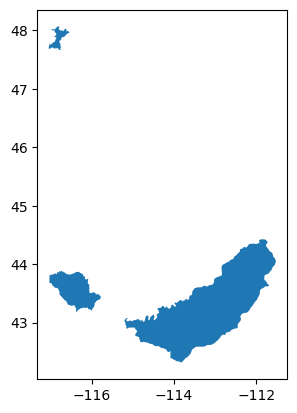

In [21]:
# plot shape info to map
gdf_Camp_Shape.plot()

In [22]:
# create output for Regulatory Area #1 dataframe
columnsList = ['in_ReportingUnitNativeID', 'geometry']
gdf_Camp_Out = pd.DataFrame(columns=columnsList, index=gdf_Camp_Shape.index)

gdf_Camp_Out['in_ReportingUnitNativeID'] = gdf_Camp_Shape["in_ReportingUnitNativeID"].astype(str)  # in_ReportingUnitNativeID needs to match source from above equivlaent datframe
gdf_Camp_Out['geometry'] = gdf_Camp_Shape['geometry']
gdf_Camp_Out = gdf_Camp_Out.drop_duplicates().reset_index(drop=True)
print(len(gdf_Camp_Out))
gdf_Camp_Out.head()

3


,in_ReportingUnitNativeID,geometry
0,wadeEasternSnake,"POLYGON ((-111.67757 44.22304, -111.67054 44.2..."
1,wadeRathdrumPrairie,"POLYGON ((-116.78942 48.04840, -116.79298 48.0..."
2,wadeTreasureValley,"POLYGON ((-116.61388 43.82598, -116.61388 43.8..."


### Groundwater Districts data

In [23]:
# already got the geometery for CD
gdf_GD_Shape = gdf_GD.copy()
gdf_GD_Shape['geometry'] = gdf_GD_Shape['geometry'].to_crs(epsg=4326)

print(len(gdf_GD_Shape))
gdf_GD_Shape.head()

13


,OBJECTID,NAME,ACRES,Shape_Leng,AreaID,DisName,ShapeSTAre,ShapeSTLen,geometry,WaDEUUID
0,1,Aberdeen-American Falls Ground Water District,974236.86803,,30,Aberdeen-American Falls,3942596726.85730,502609.65633,"POLYGON ((-113.00754 43.15430, -113.00123 43.1...",regdd0
1,2,Bonneville-Jefferson Ground Water District,353013.81394,,32,Bonneville-Jefferson,1428481975.85137,170305.57259,"POLYGON ((-112.04327 43.74231, -112.04326 43.7...",regdd1
2,3,Magic Valley Ground Water District,496532.99069,,34,Magic Valley,2009397722.07543,207039.99685,"POLYGON ((-113.95416 42.90809, -113.93447 42.9...",regdd2
3,4,North Snake Ground Water District,644061.59630,,35,North Snake,2606424807.24499,280770.63934,"POLYGON ((-114.24931 42.99654, -114.23444 42.9...",regdd3
4,5,Madison Ground Water District,177356.43754,,33,Madison,717736037.54243,125509.30818,"POLYGON ((-111.75796 43.86934, -111.75807 43.8...",regdd4


<Axes: >

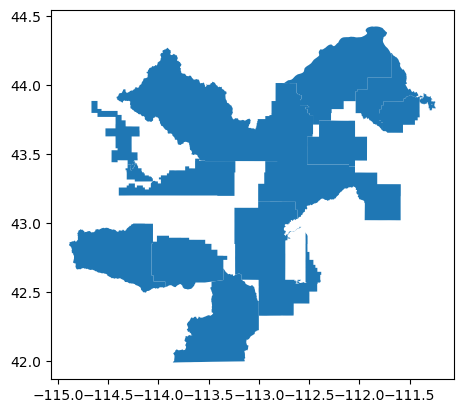

In [24]:
# plot shape info to map
gdf_GD_Shape.plot()

In [25]:
# create output for Regulatory Area #1 dataframe
columnsList = ['in_ReportingUnitNativeID', 'geometry']
gdf_GD_Out = pd.DataFrame(columns=columnsList, index=gdf_GD_Shape.index)

gdf_GD_Out['in_ReportingUnitNativeID'] = "wadeGD" + gdf_GD_Shape["OBJECTID"].astype(str)  # in_ReportingUnitNativeID needs to match source from above equivlaent datframe
gdf_GD_Out['geometry'] = gdf_GD_Shape['geometry']
gdf_GD_Out = gdf_GD_Out.drop_duplicates().reset_index(drop=True)
print(len(gdf_GD_Out))
gdf_GD_Out.head()

13


,in_ReportingUnitNativeID,geometry
0,wadeGD1,"POLYGON ((-113.00754 43.15430, -113.00123 43.1..."
1,wadeGD2,"POLYGON ((-112.04327 43.74231, -112.04326 43.7..."
2,wadeGD3,"POLYGON ((-113.95416 42.90809, -113.93447 42.9..."
3,wadeGD4,"POLYGON ((-114.24931 42.99654, -114.23444 42.9..."
4,wadeGD5,"POLYGON ((-111.75796 43.86934, -111.75807 43.8..."


### Groundwater Management Areas data

In [26]:
# already got the geometery for CD
gdf_GMA_Shape = gdf_GMA.copy()
gdf_GMA_Shape['geometry'] = gdf_GMA_Shape['geometry'].to_crs(epsg=4326)

print(len(gdf_GMA_Shape))
gdf_GMA_Shape.head()

14


,OBJECTID,NAME,ACRES,AREA_METER,PERIMETER_,HECTARES,SubArea,AreaID,DisName,ShapeSTAre,ShapeSTLen,geometry,WaDEUUID
0,1,Banbury Hot Springs,9509.58900,38483941.66100,49539.98200,3848.39400,,2,Banbury Hot Springs,38483941.66149,49539.98233,"POLYGON ((-114.84727 42.72501, -114.84739 42.7...",regma0
1,2,Bear River,1392979.38900,5637187584.77700,413953.80100,563718.75800,,41,Bear River,5637187584.43399,413953.80120,"POLYGON ((-111.67753 42.67631, -111.67753 42.6...",regma1
2,3,Big Wood River,1073376.59700,4343800976.92200,460101.77500,434380.09800,,8,Big Wood River,4343800976.95913,460101.77455,"POLYGON ((-114.67119 43.92113, -114.66952 43.9...",regma2
3,4,Boise Front,74614.74500,301955161.49000,83933.22000,30195.51600,,11,Boise Front,301955161.77371,83933.21950,"POLYGON ((-116.09458 43.51670, -116.17358 43.5...",regma3
4,5,Bruneau-Grandview,408134.24300,1651660681.81600,209083.22000,165166.06800,,15,Bruneau-Grandview,1651660681.84325,209083.21958,"POLYGON ((-116.23544 43.09397, -116.23302 43.0...",regma4


<Axes: >

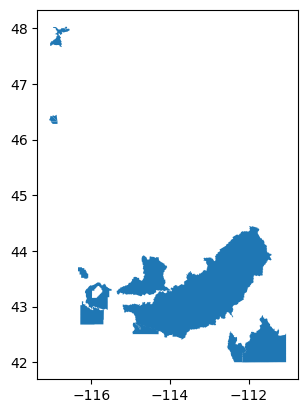

In [27]:
# plot shape info to map
gdf_GMA_Shape.plot()

In [28]:
# create output for Regulatory Area #1 dataframe
columnsList = ['in_ReportingUnitNativeID', 'geometry']
gdf_GMA_Out = pd.DataFrame(columns=columnsList, index=gdf_GMA_Shape.index)

gdf_GMA_Out['in_ReportingUnitNativeID'] =  "wadeGMA" + gdf_GMA_Shape["OBJECTID"].astype(str)  # in_ReportingUnitNativeID needs to match source from above equivlaent datframe
gdf_GMA_Out['geometry'] = gdf_GMA_Shape['geometry']
gdf_GMA_Out = gdf_GMA_Out.drop_duplicates().reset_index(drop=True)
print(len(gdf_GMA_Out))
gdf_GMA_Out.head()

14


,in_ReportingUnitNativeID,geometry
0,wadeGMA1,"POLYGON ((-114.84727 42.72501, -114.84739 42.7..."
1,wadeGMA2,"POLYGON ((-111.67753 42.67631, -111.67753 42.6..."
2,wadeGMA3,"POLYGON ((-114.67119 43.92113, -114.66952 43.9..."
3,wadeGMA4,"POLYGON ((-116.09458 43.51670, -116.17358 43.5..."
4,wadeGMA5,"POLYGON ((-116.23544 43.09397, -116.23302 43.0..."


### Aquifer Recharge District data

In [29]:
# already got the geometery for CD
gdf_ARD_Shape = gdf_ARD.copy()
gdf_ARD_Shape['geometry'] = gdf_ARD_Shape['geometry'].to_crs(epsg=4326)

print(len(gdf_ARD_Shape))
gdf_ARD_Shape.head()

1


,OBJECTID,ID,ShapeSTAre,ShapeSTLen,geometry,WaDEUUID,NAME
0,1,0,274838697.01300,152808.48622,"POLYGON ((-114.45343 42.60494, -114.45447 42.6...",reard0,Lower Snake River Aquifer Recharge District


<Axes: >

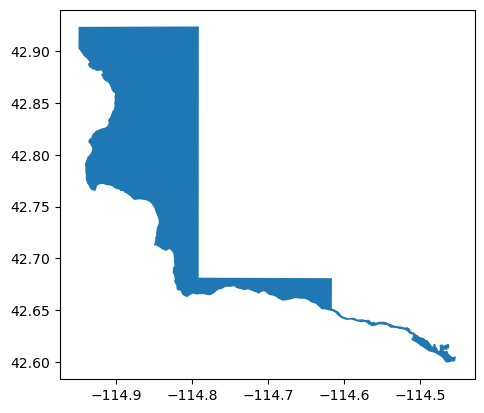

In [30]:
# plot shape info to map
gdf_ARD_Shape.plot()

In [31]:
# create output for Regulatory Area #1 dataframe
columnsList = ['in_ReportingUnitNativeID', 'geometry']
gdf_ARD_Out = pd.DataFrame(columns=columnsList, index=gdf_ARD_Shape.index)

gdf_ARD_Out['in_ReportingUnitNativeID'] =  "wadeARD" + gdf_ARD_Shape["OBJECTID"].astype(str)  # in_ReportingUnitNativeID needs to match source from above equivlaent datframe
gdf_ARD_Out['geometry'] = gdf_ARD_Shape['geometry']
gdf_ARD_Out = gdf_ARD_Out.drop_duplicates().reset_index(drop=True)
print(len(gdf_ARD_Out))
gdf_ARD_Out.head()

1


,in_ReportingUnitNativeID,geometry
0,wadeARD1,"POLYGON ((-114.45343 42.60494, -114.45447 42.6..."


### Concatenate goutdf shapefile info into single output

In [32]:
# Concatenate Basin & Subbasin DataFrames
frames = [gdf_Camp_Out, gdf_GD_Out, gdf_GMA_Out, gdf_ARD_Out] # add geoutdf dataframes here
goutdf = pd.concat(frames).reset_index(drop=True)

print(len(goutdf))
goutdf.head()

31


,in_ReportingUnitNativeID,geometry
0,wadeEasternSnake,"POLYGON ((-111.67757 44.22304, -111.67054 44.2..."
1,wadeRathdrumPrairie,"POLYGON ((-116.78942 48.04840, -116.79298 48.0..."
2,wadeTreasureValley,"POLYGON ((-116.61388 43.82598, -116.61388 43.8..."
3,wadeGD1,"POLYGON ((-113.00754 43.15430, -113.00123 43.1..."
4,wadeGD2,"POLYGON ((-112.04327 43.74231, -112.04326 43.7..."


### Inspect Output Data & Export

In [33]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(outdf.dtypes)

WaDEUUID                                  object
in_Date                                   object
in_Year                                   object
in_OrganizationUUID                       object
in_EPSGCodeCV                             object
in_ReportingUnitName                      object
in_ReportingUnitNativeID                  object
in_ReportingUnitProductVersion            object
in_ReportingUnitTypeCV                    object
in_ReportingUnitUpdateDate                object
in_StateCV                                object
in_Geometry                               object
in_OversightAgency                        object
in_RegulatoryDescription                  object
in_RegulatoryName                         object
in_RegulatoryOverlayNativeID              object
in_RegulatoryStatusCV                     object
in_RegulatoryStatute                      object
in_RegulatoryStatuteLink                  object
in_StatutoryEffectiveDate         datetime64[ns]
in_StatutoryEndDate 

In [34]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(goutdf.dtypes)

in_ReportingUnitNativeID      object
geometry                    geometry
dtype: object


In [35]:
# Export out to CSV.
outdf.to_csv('RawInputData/Pov_Main.zip', compression=dict(method='zip', archive_name='Pre_Main.csv'), index=False)  # The output, save as a zip
goutdf.to_csv('RawInputData/P_Geometry.zip', compression=dict(method='zip', archive_name='P_Geometry.csv'), index=False)  # The output geometry.